In [3]:
%matplotlib inline
import numpy as np
import matplotlib
import imageio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import pytorch modules
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import init
import functools
from torch.optim import lr_scheduler



In [54]:
# Conv3d: (in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
# input size (N,Cin,D,H,W) and output (N,Cout,Dout,Hout,Wout) 


class ThreeD_Discriminator(nn.Module):
    
    def __init__(self, args):
        super(ThreeD_Discriminator, self).__init__()
        self.args = args
        self.cube_len = args.cube_len

        padd = (0,0,0)
        if self.cube_len == 32:
            padd = (1,1,1)
            
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv3d(1, self.cube_len, kernel_size=4, stride=2, bias=args.bias, padding=(1, 1, 1)),
            torch.nn.BatchNorm3d(self.cube_len),
            torch.nn.LeakyReLU(self.args.leak_value)
        )
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv3d(self.cube_len, self.cube_len*2, kernel_size=4, stride=2, bias=args.bias, padding=(1, 1, 1)),
            torch.nn.BatchNorm3d(self.cube_len*2),
            torch.nn.LeakyReLU(self.args.leak_value)
        )
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv3d(self.cube_len*2, self.cube_len*4, kernel_size=4, stride=2, bias=args.bias, padding=(1, 1, 1)),
            torch.nn.BatchNorm3d(self.cube_len*4),
            torch.nn.LeakyReLU(self.args.leak_value)
        )
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv3d(self.cube_len*4, self.cube_len*8, kernel_size=4, stride=2, bias=args.bias, padding=(1, 1, 1)),
            torch.nn.BatchNorm3d(self.cube_len*8),
            torch.nn.LeakyReLU(self.args.leak_value)
        )
        self.layer5 = torch.nn.Sequential(
            torch.nn.Conv3d(self.cube_len*8, 1, kernel_size=4, stride=2, bias=args.bias, padding=padd),
            torch.nn.Sigmoid()
        )
        
    def forward(self, x):
        #print(x)
        out = x.view(-1, 1, self.args.cube_len, self.args.cube_len, self.args.cube_len)
        print(out.size()) # torch.Size([100, 1, 32, 32, 32])
        out = self.layer1(out)
        print(out.size())  # torch.Size([100, 32, 16, 16, 16])
        out = self.layer2(out)
        print(out.size())  # torch.Size([100, 64, 8, 8, 8])
        out = self.layer3(out)
        print(out.size())  # torch.Size([100, 128, 4, 4, 4])
        out = self.layer4(out)
        print(out.size())  # torch.Size([100, 256, 2, 2, 2])
        out = self.layer5(out)
        print(out.size())  # torch.Size([100, 1, 1, 1, 1])

        return out
        

In [27]:
class args:
    cube_len = 32
    leak_value = 0.2
    bias = False



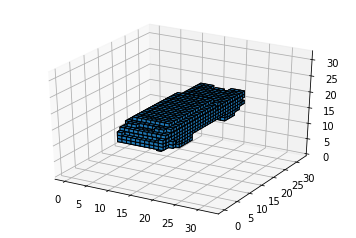

In [36]:
voxels = np.load("./voxels.npy")
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels[0], edgecolor='k')

plt.show()


In [59]:
testVoxel = torch.from_numpy(voxels[0]).view(1, *voxels[0].shape).type(torch.FloatTensor)
D_threeD = ThreeD_Discriminator(args)
output = D_threeD(Variable(testVoxel))

torch.Size([1, 1, 32, 32, 32])
torch.Size([1, 32, 16, 16, 16])
torch.Size([1, 64, 8, 8, 8])
torch.Size([1, 128, 4, 4, 4])
torch.Size([1, 256, 2, 2, 2])
torch.Size([1, 1, 1, 1, 1])


In [61]:
output.data.numpy()

array([[[[[ 0.49641809]]]]], dtype=float32)